## Libs

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)

import matplotlib.pyplot as plt

import sys 
sys.path.append('../_jjtools')

import JJformulas as jjf
from JJ_data_processing import eng_string, show_df, calc_jj_param 

D:\anaconda\lib\site-packages\qcodes\dataset\database.py:13: UserWarning: The module `qcodes.dataset.database` is deprecated.
Public features are available at the import of `qcodes`.
Private features are available in `qcodes.dataset.sqlite.*` modules.
  warnings.warn('The module `qcodes.dataset.database` is deprecated.\n'


In [3]:
ft = pd.read_excel("chain table.xlsx", index_col = 0)

In [3]:
import os

In [18]:
os.getcwd().split('\\').index('!_chains')

4

In [14]:
os.path.realpath('..\\..').split(os.sep)

['e:', 'OneDrive - Rutgers University', 'files_GitHub']

# Data load

## by hands

In [3]:
keys =    [             'Vo_tot', 'Rn_tot',   'Isw' , 'Ro_tot' , 'RoFF' ,    'N', 'Npar', 'dsgn',         'Ajj',  'status' ]
# unit =   [                 'V',   'ohm',     'A' ,  'ohm' ,  'ohm' ,   'ea',   'ea',     '',            'm^2', 'measd']
lst  =    {'D053N2'    : [1.610e-3,   9.3e3,    9e-8 ,  np.nan,  np.nan,    20 ,      2,  'Fin',        0.04e-12, 'fabd' ],
           'D055B1N9'  : [1.675e-3, 1.15e5, 1.53e-10, 1.006e6, 6.668e8,    20 ,      2,  'Fin',        0.04e-12, 'fabd' ],
           'D059B6N3'  : [1.875e-3, 8.43e4, 1.98e-9 , 7.883e4, 2.591e7,    20 ,      2,  'Fin',        0.04e-12, 'fabd' ],
           'D059B0N1'  : [2.178e-4, 8.75e3,  3.9e-9 , 1.314e3, 1.650e9,     2 ,      2,  'Fin',        0.04e-12, 'fabd' ],
           'D059BBN2'  : [1.385e-3, 1.75e6,  3.2e-13, 2.367e8, 9.032e8,    20 ,      2,  'Fin',        0.04e-12, 'fabd' ],
           'D062B3N2'  : [2.495e-3, 9.93e5,  2.1e-11, 4.319e6, 8.931e8,    20 ,      2,  'Fin',        0.04e-12, 'fabd' ],
           'D060B2N6'  : [3.345e-3, 6.64e5,  1.2e-12, 2.292e7, 9.587e8,    20 ,      2,  'Fin',        0.04e-12, 'fabd' ],
           'D060B2N2'  : [3.186e-4, 1.19e5, 2.68e-12, 2.909e7, 9.209e8,     4 ,      2,  'Fin',        0.04e-12, 'fabd' ],
           'D063BAN6_b': [5.010e-3, 5.94e5,  2.0e-11, 7.715e6, 9.350e8,    30 ,      2,  'x_s',        0.04e-12, 'fabd' ],
           'D063BAN6_a': [3.070e-3, 5.85e5,  2.2e-11, 2.650e5, 1.380e7,    30 ,      2,  'x_s',           4e-12, 'fabd' ],
           'D066B8N5_b': [1.720e-3, 6.61e4,  5.4e-9 , 8.510e2, 1.463e8,    30 ,      2,  'x_s',        0.04e-12, 'fabd' ],
           'D070B1N0'  : [  np.nan, 1.68e5,  1.6e-10, 2.373e4,  np.nan,    15 ,      2,  'x_L',           4e-12, 'measd'],
           'D079N6'    : [1.645e-4, 1.45e3, 1.37e-7 ,  2.20e0,  np.nan,     1 ,      2,  'x_L',        3.74e-12, 'measd'],
           'D079N5'    : [2.021e-3, 2.33e4,  5.6e-9 , -3.07e2,  np.nan,    15 ,      2,  'x_L',        3.74e-12, 'fabd'],
           'D074N4'    : [1.972e-3, 1.35e4,  9.0e-9 ,  1.00e0,  np.nan,     9 ,      2,  'x_L',        2.25e-12, 'measd'],
           'D078N0'    : [1.931e-3, 2.54e5, 3.71e-11,  1.00e4,  np.nan,    15 ,      2,  'x_L',           4e-12, 'measd'],
           'D078N5'    : [9.685e-5, 1.67e4,  8.0e-10,  1.00e5,  np.nan,     1 ,      2,  'x_L',           4e-12, 'measd' ],
           'D059BBN1'  : [   1e-99,   745e3,  0.6e-12,   240e6,  np.nan,    30 ,      2,  'x_L', 2.00 * 2.00e-12, 'fabd' ],
           'D059BBN2_n': [   1e-99,  1950e3,   np.nan,  np.nan,  np.nan,    30 ,      2,  'x_L', .150 * .150e-12, 'fabd' ],
           'D059BBN8'  : [   1e-99,  1780e3, 0.75e-12,    50e6,  np.nan,    30 ,      2,  'x_L', 2.00 * 2.00e-12, 'fabd' ]}


full_table = pd.DataFrame.from_dict(lst, orient='index', columns = keys )

full_table.to_excel("chain table.xlsx")

ft = full_table
show_df(ft, sort = None)

,Ajj,Isw,N,Npar,Rn_tot,RoFF,Ro_tot,Vo_tot,dsgn,status
D053N2,40.0f,90.0n,20,2,9.3k,NaN,NaN,1.6m,Fin,fabd
D055B1N9,40.0f,153.0p,20,2,115.0k,666.8M,1.0M,1.7m,Fin,fabd
D059B0N1,40.0f,3.9n,2,2,8.8k,1.6G,1.3k,217.8u,Fin,fabd
D059B6N3,40.0f,2.0n,20,2,84.3k,25.9M,78.8k,1.9m,Fin,fabd
D059BBN1,4.0p,600.0f,30,2,745.0k,NaN,240.0M,0.0y,x_L,fabd
D059BBN2,40.0f,320.0f,20,2,1.8M,903.2M,236.7M,1.4m,Fin,fabd
D059BBN2_n,22.5f,NaN,30,2,2.0M,NaN,NaN,0.0y,x_L,fabd
D059BBN8,4.0p,750.0f,30,2,1.8M,NaN,50.0M,0.0y,x_L,fabd
D060B2N2,40.0f,2.7p,4,2,119.0k,920.9M,29.1M,318.6u,Fin,fabd
D060B2N6,40.0f,1.2p,20,2,664.0k,958.7M,22.9M,3.3m,Fin,fabd


## from excel

In [9]:
ft = pd.read_excel("chain table.xlsx", index_col = 'dev_name')


# Add new batch

If we fabricated a new sample and want to add the info about all sites to the database

In [5]:
keys =    [             'Rn_tot',  'N',    'Npar', 'dsgn',   'Ajj',  'status' ]

lst  =    {'D0xxN1'  : [  1e3,      20 ,      2,    'Fin',   0.04e-12, 'fabd' ],
           'D0xxN2'  : [  1e5,      20 ,      2,    'Fin',   0.04e-12, 'fabd' ],
           'D0xxN3'  : [  1e4,      20 ,      2,    'Fin',   0.04e-12, 'fabd' ],
           'D0xxN4'  : [  1e3,       2 ,      2,    'Fin',   0.04e-12, 'fabd' ],
           'D0xxN5'  : [  1e6,      20 ,      2,    'Fin',   0.04e-12, 'fabd' ],
           'D0xxN6'  : [  1e5,      20 ,      2,    'Fin',   0.04e-12, 'fabd' ]}

new_sample = pd.DataFrame.from_dict(lst, orient='index', columns = keys )


In [11]:
ft = ft.append(new_sample)

show_df(ft)


,Ajj,Isw,N,Npar,Rn_tot,RoFF,Ro_tot,Vo_tot,dsgn,status
dev_name,,,,,,,,,,
D053N2,40.0f,90.0n,20,2,9300,NaN,NaN,1.6m,Fin,measd
D055B1N9,40.0f,153.0p,20,2,115000,666.8M,1.0M,1.7m,Fin,fabd
D059B0N1,40.0f,3.9n,2,2,8750,1.6G,1.3k,217.8u,Fin,fabd
D059B6N3,40.0f,2.0n,20,2,84300,25.9M,78.8k,1.9m,Fin,fabd
D059BBN1,4.0p,600.0f,30,2,745000,NaN,240.0M,0.0y,x_L,fabd
D059BBN2,40.0f,320.0f,20,2,1750000,903.2M,236.7M,1.4m,Fin,fabd
D059BBN2_n,22.5f,NaN,30,2,1950000,NaN,NaN,0.0y,x_L,fabd
D059BBN8,4.0p,750.0f,30,2,1780000,NaN,50.0M,0.0y,x_L,fabd
D060B2N2,40.0f,2.7p,4,2,119000,920.9M,29.1M,318.6u,Fin,fabd


# Calculate jj parameters

In [62]:
calc_params = calc_jj_param(ft)
ft = ft.assign(**calc_params)


ft.to_excel("chain table.xlsx")
show_df(ft)


,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D053N2,40.0f,185.9m,14.6,611.3n,90.0n,20,2,465.0,9.3k,NaN,NaN,NaN,1.6m,Fin,fabd,4.7
D055B1N9,40.0f,185.9m,1.2,49.4n,153.0p,20,2,5.8k,115.0k,50.3k,666.8M,1.0M,1.7m,Fin,fabd,1.3
D059B0N1,40.0f,185.9m,1.5,65.0n,3.9n,2,2,4.4k,8.8k,657.0,1.6G,1.3k,217.8u,Fin,fabd,1.5
D059B6N3,40.0f,185.9m,1.6,67.4n,2.0n,20,2,4.2k,84.3k,3.9k,25.9M,78.8k,1.9m,Fin,fabd,1.5
D059BBN1,4.0p,2.3m,272.9m,11.4n,600.0f,30,2,24.8k,745.0k,8.0M,NaN,240.0M,0.0y,x_L,fabd,70.4m
D059BBN2,40.0f,185.9m,77.4m,3.2n,320.0f,20,2,87.5k,1.8M,11.8M,903.2M,236.7M,1.4m,Fin,fabd,339.4m
D059BBN2_n,22.5f,309.9m,104.2m,4.4n,NaN,30,2,65.0k,2.0M,NaN,NaN,NaN,0.0y,x_L,fabd,508.4m
D059BBN8,4.0p,2.3m,114.2m,4.8n,750.0f,30,2,59.3k,1.8M,1.7M,NaN,50.0M,0.0y,x_L,fabd,45.5m
D060B2N2,40.0f,185.9m,227.8m,9.6n,2.7p,4,2,29.8k,119.0k,7.3M,920.9M,29.1M,318.6u,Fin,fabd,582.0m
D060B2N6,40.0f,185.9m,204.1m,8.6n,1.2p,20,2,33.2k,664.0k,1.1M,958.7M,22.9M,3.3m,Fin,fabd,551.0m


# Make pretty table

clickable label if measured

In [14]:
show_df(ft, 
         which = 'all',
         sort = 'N', 
         find = 'D070' 
         )

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D070B1N0,4.0p,2.3m,605.0m,25.4n,160.0p,15,2,11.2k,168.0k,1.6k,NaN,23.7k,NaN,x_L,measd,104.8m


In [5]:
show_df(ft, 
         which = ['Ej', 'Isw', 'Ro', 'N'],
         sort = 'Isw'
         )

,Ej,Isw,Ro,N
D059BBN2,77.4m,320.0f,11.8M,20
D059BBN1,181.9m,600.0f,12.0M,20
D059BBN8,76.1m,750.0f,2.5M,20
D060B2N6,204.1m,1.2p,1.1M,20
D060B2N2,227.8m,2.7p,7.3M,4
D063BAN6_b,342.2m,20.0p,257.2k,30
D062B3N2,136.5m,21.0p,216.0k,20
D063BAN6_a,347.5m,22.0p,8.8k,30
D055BCN7,392.8m,36.0p,1.5M,20
D078N0,400.1m,37.1p,666.7,15


# Plotting

In [10]:
ft = pd.read_excel("chain table.xlsx")

## as pd method

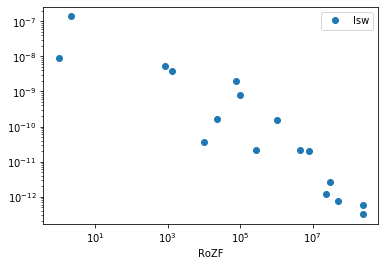

In [78]:
ax = ft.plot(x = 'RoZF', y = 'Isw', marker = 'o', ls = '')

ax.set_xscale('log')
ax.set_yscale('log')

## as plt method

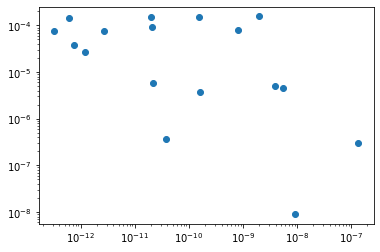

In [79]:
fig, ax = plt.subplots()
ax.plot(ft['Isw'], ft['Isw']*ft['RoZF'], 'o')

ax.set_xscale('log')
ax.set_yscale('log')

## annotation

In [42]:
7/5

1.4

<IPython.core.display.Javascript object>


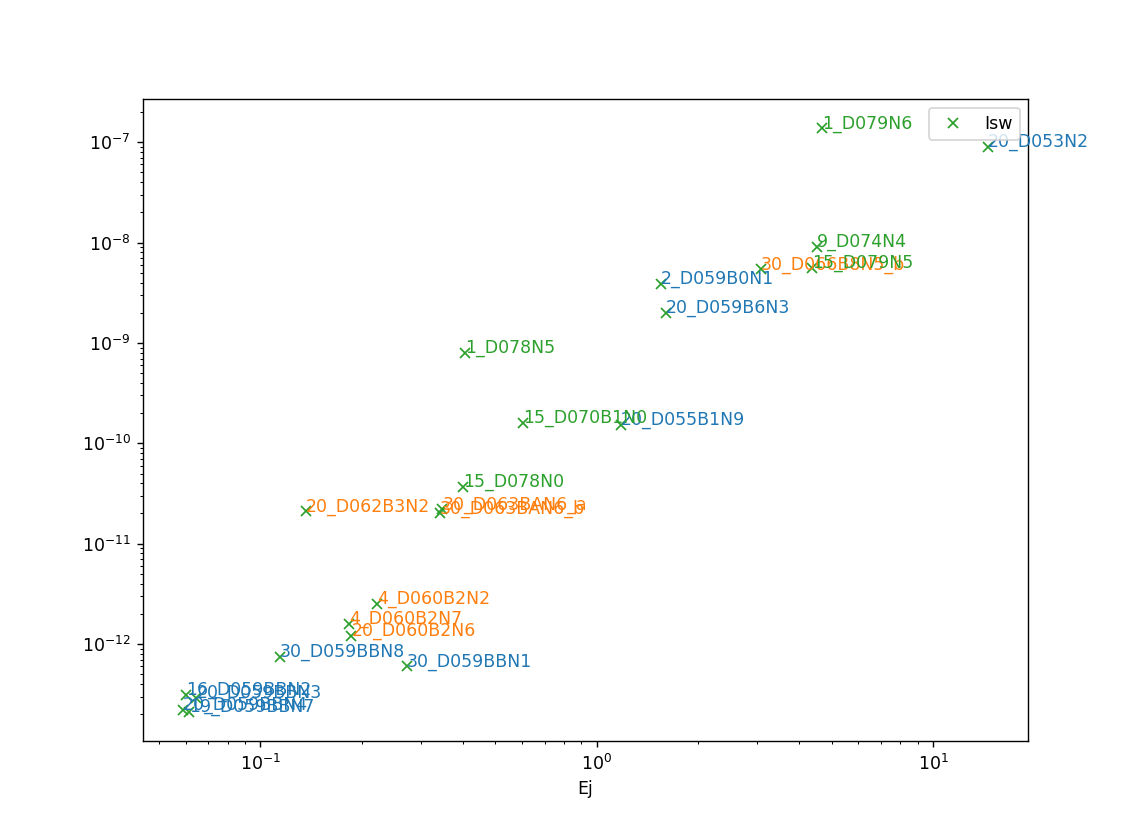

In [6]:
colormap = { 'D05' : 'C0', 'D06' : 'C1'}

ax = ft.plot( x = 'Ej', y = 'Isw', color ='C2', marker = 'x', ls = '')

for dev_name in ft.index:
    dev = ft.loc[dev_name]
#         dev = ft.loc[dev_name]
    text = '{:d}_{}'.format(dev['N'],dev_name)
#     ax.annotate( text, ( dev['Ej'], dev['Isw']), color = colormap.get(dev_name[:3], 'C2'))

    ax.annotate( text, ( dev['Ej'], dev['Isw']), color = colormap.get(dev_name[:3], 'C2'))
    
ax.set_xscale('log')
ax.set_yscale('log')



<IPython.core.display.Javascript object>


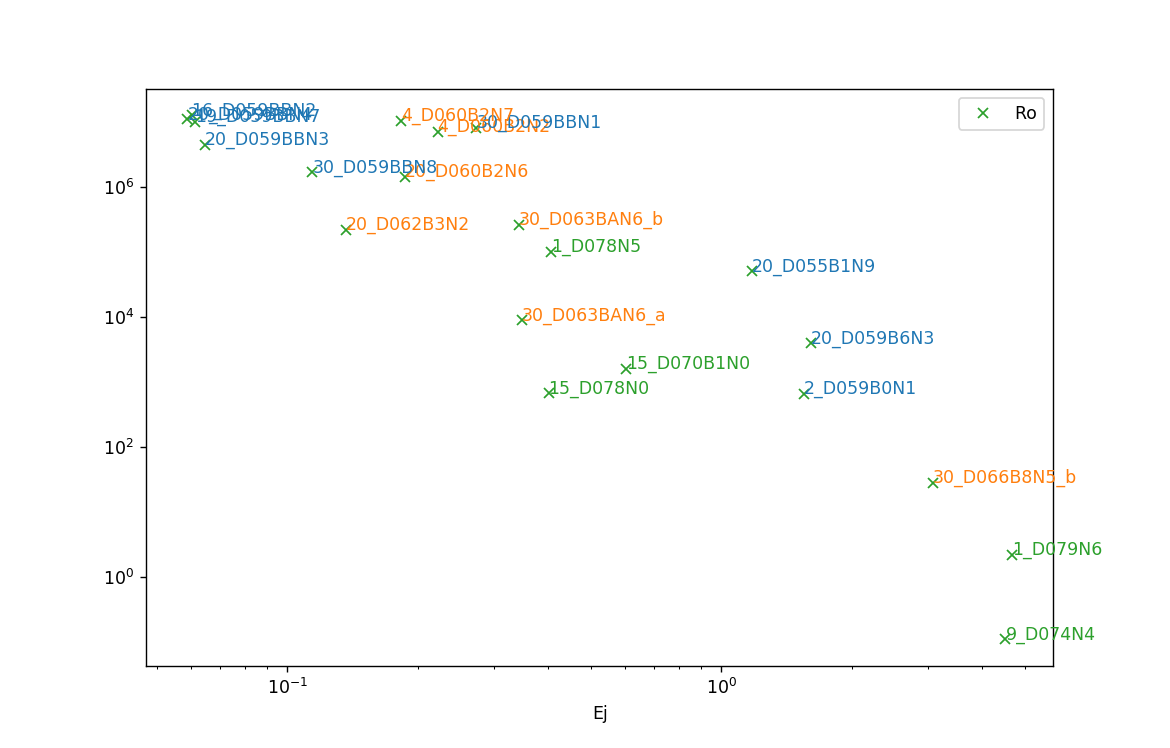

In [7]:
colormap = { 'D05' : 'C0', 'D06' : 'C1'}

ax = ft.plot( x = 'Ej', y = 'Ro', color ='C2', marker = 'x', ls = '')

for dev_name in ft.index:
    dev = ft.loc[dev_name]
    text = '{:d}_{}'.format(dev['N'],dev_name)
    ax.annotate( text, ( dev['Ej'], dev['Ro']), color = colormap.get(dev_name[:3], 'C2'))
    
ax.set_xscale('log')
ax.set_yscale('log')

